In [70]:
import numpy as np
import pandas as pd
from statsmodels.tsa.stattools import adfuller, grangercausalitytests
from statsmodels.tools.eval_measures import mse, rmse, meanabs
from statsmodels.graphics.tsaplots import month_plot, seasonal_plot, quarter_plot

In [2]:
df1 = pd.read_csv('Data/airline_passengers.csv',index_col=0,parse_dates=True)
df2 = pd.read_csv('Data/DailyTotalFemaleBirths.csv',index_col=0,parse_dates=True)

In [3]:
df1.shape, df2.shape

((144, 1), (365, 1))

In [4]:
df1.head()

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [5]:
df2.head()

,Births
Date,
1959-01-01,35
1959-01-02,32
1959-01-03,30
1959-01-04,31
1959-01-05,44


In [6]:
df1.index.freq = 'MS'

In [7]:
df2.index.freq = 'D'

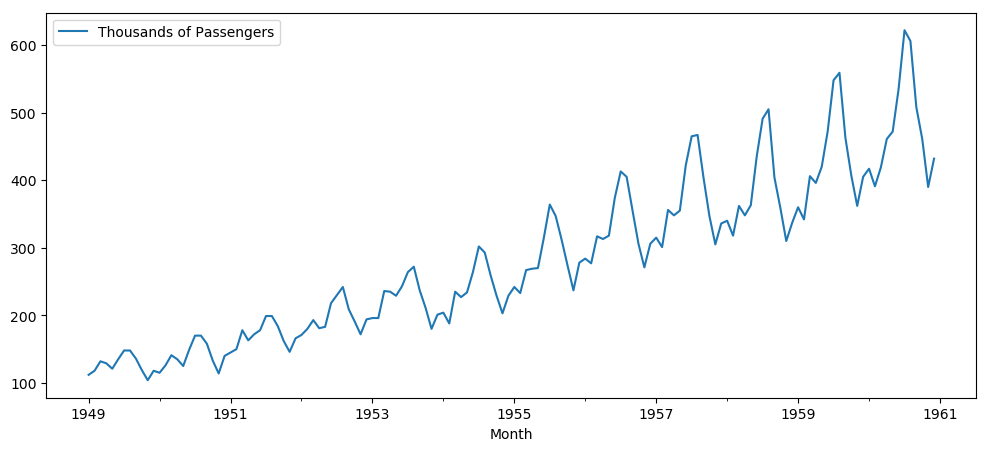

In [8]:
df1.plot(figsize=(12,5));

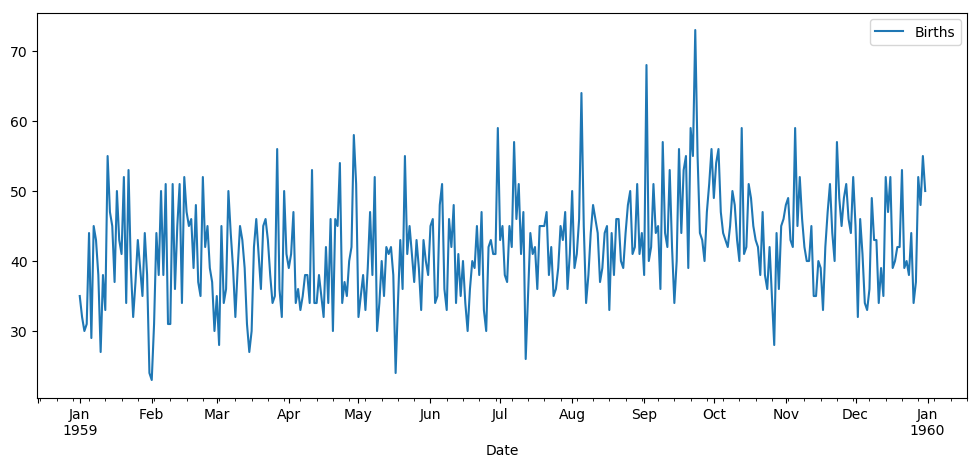

In [9]:
df2.plot(figsize=(12,5));

### Descriptive Statistics and Stationarity-Check Tests

In [13]:
adfuller(df1['Thousands of Passengers'])

(0.8153688792060543,
 0.9918802434376411,
 13,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 996.692930839019)

In [14]:
help(adfuller)

Help on function adfuller in module statsmodels.tsa.stattools:

adfuller(x, maxlag=None, regression='c', autolag='AIC', store=False, regresults=False)
    Augmented Dickey-Fuller unit root test
    
    The Augmented Dickey-Fuller test can be used to test for a unit root in a
    univariate process in the presence of serial correlation.
    
    Parameters
    ----------
    x : array_like, 1d
        data series
    maxlag : int
        Maximum lag which is included in test, default 12*(nobs/100)^{1/4}
    regression : {'c','ct','ctt','nc'}
        Constant and trend order to include in regression
    
        * 'c' : constant only (default)
        * 'ct' : constant and trend
        * 'ctt' : constant, and linear and quadratic trend
        * 'nc' : no constant, no trend
    autolag : {'AIC', 'BIC', 't-stat', None}
        * if None, then maxlag lags are used
        * if 'AIC' (default) or 'BIC', then the number of lags is chosen
          to minimize the corresponding information 

In [21]:
adf_results = adfuller(df1['Thousands of Passengers'])
df_results = pd.Series(adf_results[:4],index=['test-statistic','p-value','# lags','# observations'])
df_results

test-statistic      0.815369
p-value             0.991880
# lags             13.000000
# observations    130.000000
dtype: float64

In [22]:
for key, val in adf_results[4].items():
    df_results[f'critical_value({key})'] = val

In [23]:
df_results

test-statistic           0.815369
p-value                  0.991880
# lags                  13.000000
# observations         130.000000
critical_value(1%)      -3.481682
critical_value(5%)      -2.884042
critical_value(10%)     -2.578770
dtype: float64

In [25]:
print(df_results.to_string())

test-statistic           0.815369
p-value                  0.991880
# lags                  13.000000
# observations         130.000000
critical_value(1%)      -3.481682
critical_value(5%)      -2.884042
critical_value(10%)     -2.578770


In [26]:
if df_results[1] <= 0.05:
    print("Strong evidence against the null hypothesis.")
    print("We reject the null hypothesis.")
    print("Data has no unit root and is stationary.")
else:
    print("Weak evidence against the null hypothesis.")
    print("We fail to reject the null hypothesis.")
    print("Data has a unit root and is non-stationary.")

Weak evidence against the null hypothesis.
We fail to reject the null hypothesis.
Data has a unit root and is non-stationary.


In [33]:
def adf_test(series,title=''):
    """
        Pass in a time series and an optional title. This returns an ADF results report
    """
    print(f"Augmented Dickey-Fuller Test: {title}")
    adf_results = adfuller(series.dropna(),autolag='AIC') # .dropna() removes differenced data
    
    df_results = pd.Series(adf_results[:4],index=['test-statistic','p-value','# lags','# observations'])
    
    for key, val in adf_results[4].items():
        df_results[f'critical_value({key})'] = val
        
    df_results = df_results.to_string()
    print(df_results)
    
    if adf_results[1] <= 0.05:
        print("Strong evidence against the null hypothesis.")
        print("We reject the null hypothesis.")
        print("Data has no unit root and is stationary.")
    else:
        print("Weak evidence against the null hypothesis.")
        print("We fail to reject the null hypothesis.")
        print("Data has a unit root and is non-stationary.")

In [36]:
adf_test(df1['Thousands of Passengers'])

Augmented Dickey-Fuller Test: 
test-statistic           0.815369
p-value                  0.991880
# lags                  13.000000
# observations         130.000000
critical_value(1%)      -3.481682
critical_value(5%)      -2.884042
critical_value(10%)     -2.578770
Weak evidence against the null hypothesis.
We fail to reject the null hypothesis.
Data has a unit root and is non-stationary.


In [37]:
adf_test(df2['Births'])

Augmented Dickey-Fuller Test: 
test-statistic          -4.808291
p-value                  0.000052
# lags                   6.000000
# observations         358.000000
critical_value(1%)      -3.448749
critical_value(5%)      -2.869647
critical_value(10%)     -2.571089
Strong evidence against the null hypothesis.
We reject the null hypothesis.
Data has no unit root and is stationary.


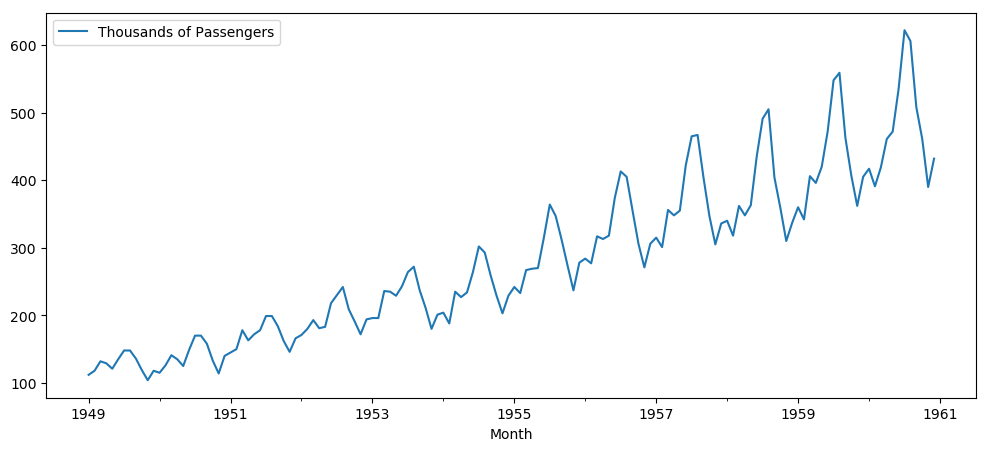

In [38]:
df1.plot(figsize=(12,5));

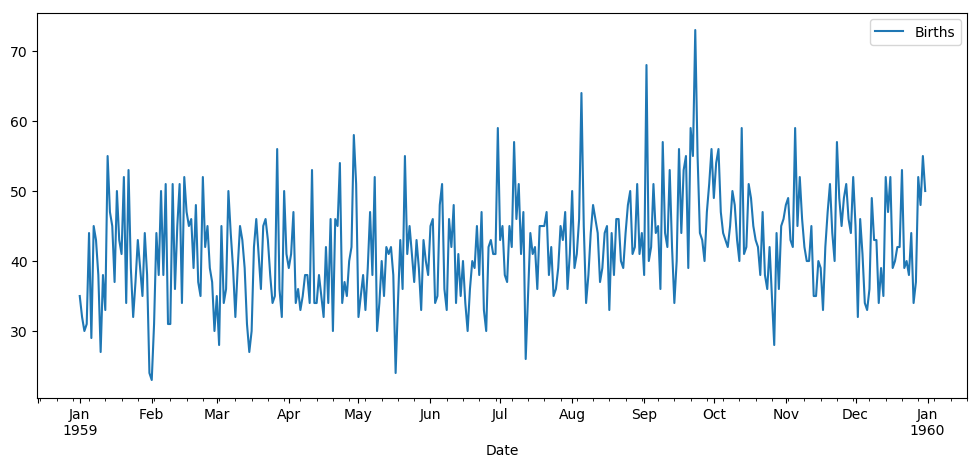

In [39]:
df2.plot(figsize=(12,5));

In [40]:
df3 = pd.read_csv('Data/samples.csv',index_col=0,parse_dates=True)
df3.head()

,a,b,c,d
1950-01-01,36,27,0,67
1950-02-01,58,22,3,31
1950-03-01,61,17,5,67
1950-04-01,37,15,8,47
1950-05-01,66,13,8,62


In [41]:
df3.index.freq = 'MS'

In [42]:
df3.shape

(120, 4)

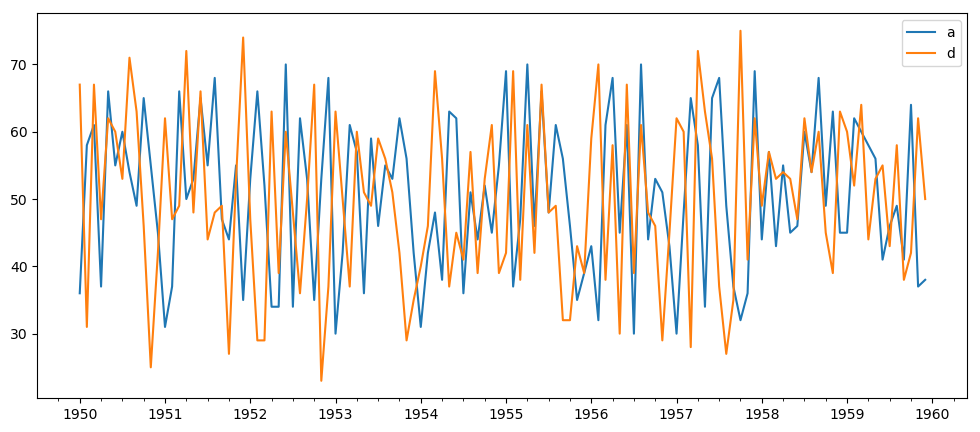

In [45]:
df3[['a','d']].plot(figsize=(12,5));

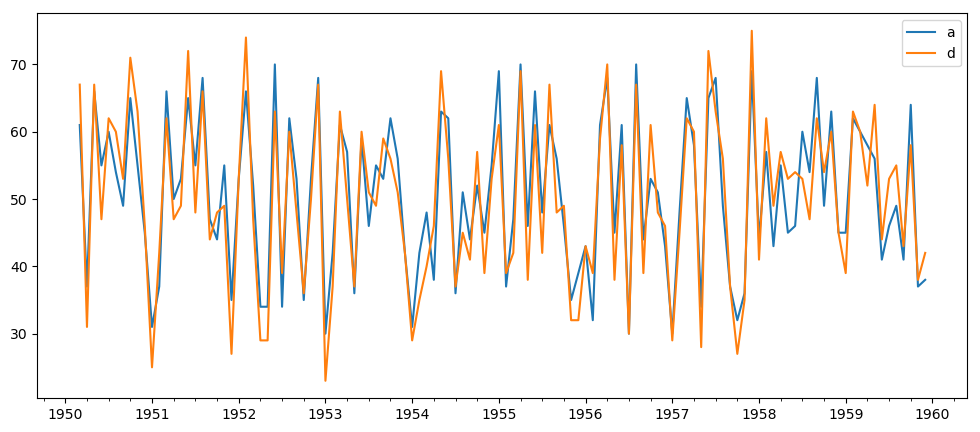

In [47]:
df3['a'].iloc[2:].plot(figsize=(12,5),legend=True)
df3['d'].shift(2).plot(legend=True);

In [53]:
grangercausalitytests(df3[['a','d']],maxlag=3);


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.7051  , p=0.1942  , df_denom=116, df_num=1
ssr based chi2 test:   chi2=1.7492  , p=0.1860  , df=1
likelihood ratio test: chi2=1.7365  , p=0.1876  , df=1
parameter F test:         F=1.7051  , p=0.1942  , df_denom=116, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=286.0339, p=0.0000  , df_denom=113, df_num=2
ssr based chi2 test:   chi2=597.3806, p=0.0000  , df=2
likelihood ratio test: chi2=212.6514, p=0.0000  , df=2
parameter F test:         F=286.0339, p=0.0000  , df_denom=113, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=188.7446, p=0.0000  , df_denom=110, df_num=3
ssr based chi2 test:   chi2=602.2669, p=0.0000  , df=3
likelihood ratio test: chi2=212.4789, p=0.0000  , df=3
parameter F test:         F=188.7446, p=0.0000  , df_denom=110, df_num=3


In [55]:
grangercausalitytests(df3[['a','c']],maxlag=3);


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.1292  , p=0.7199  , df_denom=116, df_num=1
ssr based chi2 test:   chi2=0.1325  , p=0.7158  , df=1
likelihood ratio test: chi2=0.1325  , p=0.7159  , df=1
parameter F test:         F=0.1292  , p=0.7199  , df_denom=116, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.8111  , p=0.4469  , df_denom=113, df_num=2
ssr based chi2 test:   chi2=1.6940  , p=0.4287  , df=2
likelihood ratio test: chi2=1.6820  , p=0.4313  , df=2
parameter F test:         F=0.8111  , p=0.4469  , df_denom=113, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.4467  , p=0.7201  , df_denom=110, df_num=3
ssr based chi2 test:   chi2=1.4255  , p=0.6996  , df=3
likelihood ratio test: chi2=1.4169  , p=0.7016  , df=3
parameter F test:         F=0.4467  , p=0.7201  , df_denom=110, df_num=3


In [56]:
grangercausalitytests(df3[['b','d']],maxlag=3);


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.5225  , p=0.2197  , df_denom=116, df_num=1
ssr based chi2 test:   chi2=1.5619  , p=0.2114  , df=1
likelihood ratio test: chi2=1.5517  , p=0.2129  , df=1
parameter F test:         F=1.5225  , p=0.2197  , df_denom=116, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.4350  , p=0.6483  , df_denom=113, df_num=2
ssr based chi2 test:   chi2=0.9086  , p=0.6349  , df=2
likelihood ratio test: chi2=0.9051  , p=0.6360  , df=2
parameter F test:         F=0.4350  , p=0.6483  , df_denom=113, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.5333  , p=0.6604  , df_denom=110, df_num=3
ssr based chi2 test:   chi2=1.7018  , p=0.6365  , df=3
likelihood ratio test: chi2=1.6895  , p=0.6393  , df=3
parameter F test:         F=0.5333  , p=0.6604  , df_denom=110, df_num=3


In [50]:
help(grangercausalitytests)

Help on function grangercausalitytests in module statsmodels.tsa.stattools:

grangercausalitytests(x, maxlag, addconst=True, verbose=True)
    four tests for granger non causality of 2 timeseries
    
    all four tests give similar results
    `params_ftest` and `ssr_ftest` are equivalent based on F test which is
    identical to lmtest:grangertest in R
    
    Parameters
    ----------
    x : array, 2d
        data for test whether the time series in the second column Granger
        causes the time series in the first column
    maxlag : integer
        the Granger causality test results are calculated for all lags up to
        maxlag
    verbose : bool
        print results if true
    
    Returns
    -------
    results : dictionary
        all test results, dictionary keys are the number of lags. For each
        lag the values are a tuple, with the first element a dictionary with
        teststatistic, pvalues, degrees of freedom, the second element are
        the OLS estim

In [57]:
grangercausalitytests(df3[['b','c']],maxlag=3);


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=38.5133 , p=0.0000  , df_denom=116, df_num=1
ssr based chi2 test:   chi2=39.5094 , p=0.0000  , df=1
likelihood ratio test: chi2=34.1161 , p=0.0000  , df=1
parameter F test:         F=38.5133 , p=0.0000  , df_denom=116, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=24.9899 , p=0.0000  , df_denom=113, df_num=2
ssr based chi2 test:   chi2=52.1912 , p=0.0000  , df=2
likelihood ratio test: chi2=43.2161 , p=0.0000  , df=2
parameter F test:         F=24.9899 , p=0.0000  , df_denom=113, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=11.1712 , p=0.0000  , df_denom=110, df_num=3
ssr based chi2 test:   chi2=35.6464 , p=0.0000  , df=3
likelihood ratio test: chi2=31.1162 , p=0.0000  , df=3
parameter F test:         F=11.1712 , p=0.0000  , df_denom=110, df_num=3


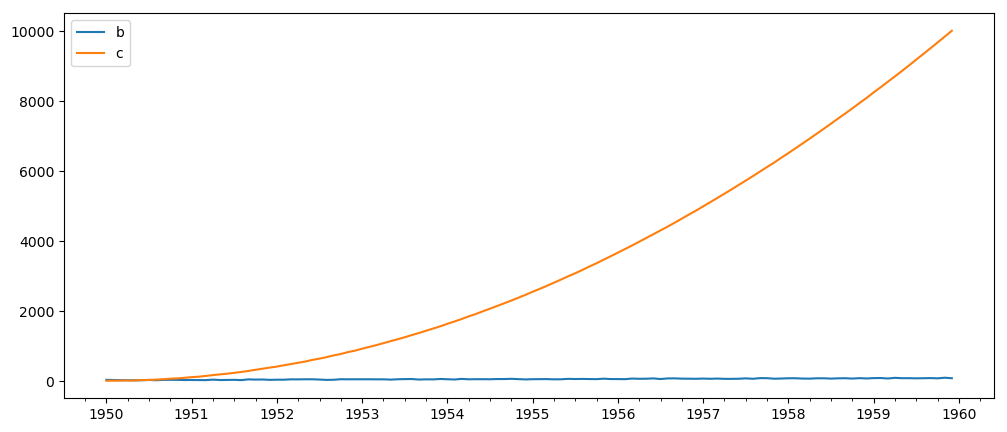

In [58]:
df3[['b','c']].plot(figsize=(12,5));

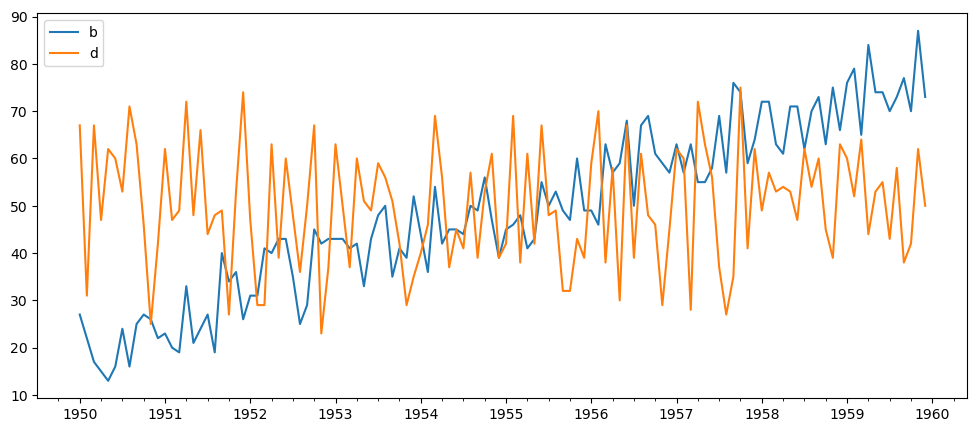

In [59]:
df3[['b','d']].plot(figsize=(12,5));

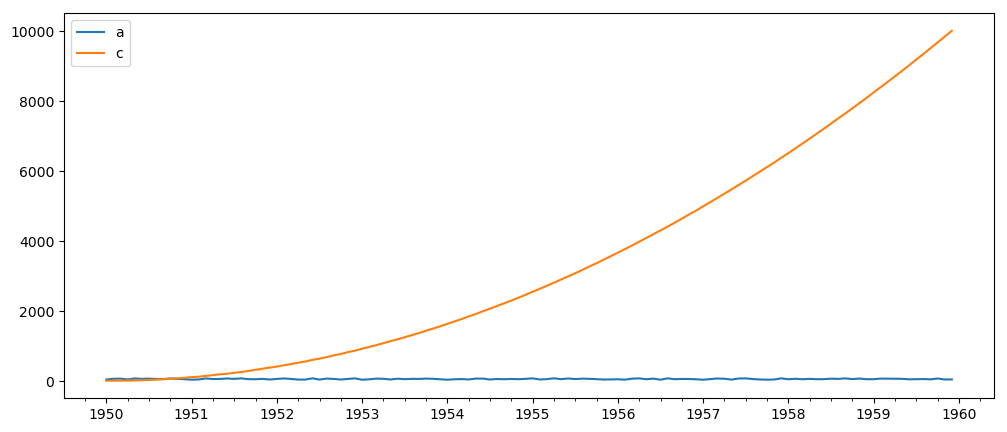

In [60]:
df3[['a','c']].plot(figsize=(12,5));

In [61]:
np.random.seed(68)

df = pd.DataFrame(np.random.randint(25,32,(100,2)),columns=['test','predictions'])
df.head()

,test,predictions
0,27,29
1,27,29
2,25,29
3,25,29
4,31,29


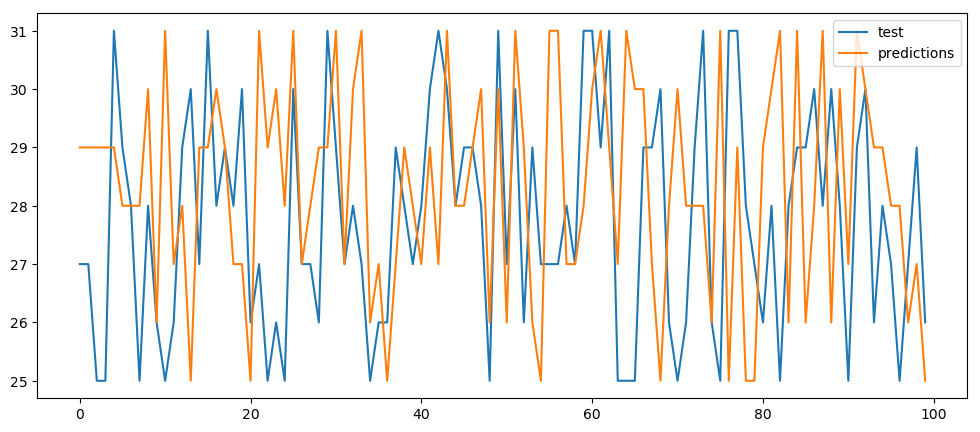

In [63]:
df.plot(figsize=(12,5));

### Evaluating forecasting predictions

In [66]:
print("MSE:",mse(df.test,df.predictions))
print("MAE:",meanabs(df.test,df.predictions))
print("RMSE:",rmse(df.test,df.predictions))

MSE: 7.1
MAE: 2.18
RMSE: 2.6645825188948455


### Exposing seasonality using month and quarter plots

In [67]:
df = pd.read_csv('Data/airline_passengers.csv',index_col=0,parse_dates=True)
df.head()

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [68]:
df.index.freq = 'MS'

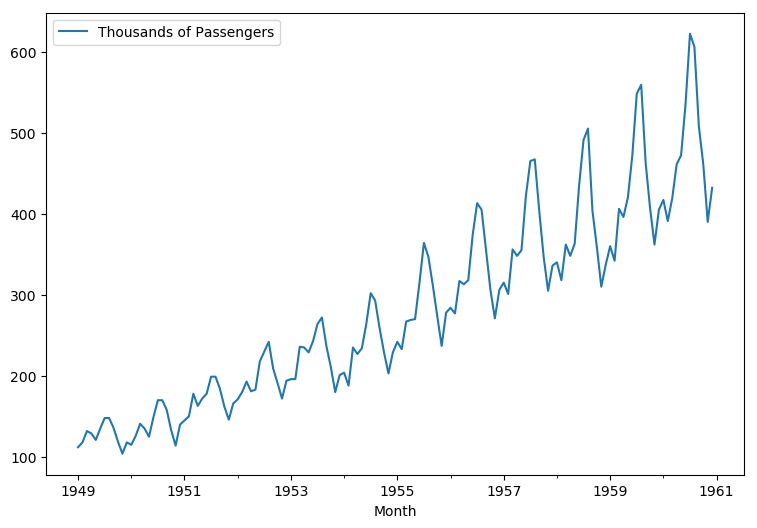

In [69]:
df.plot(figsize=(9,6));

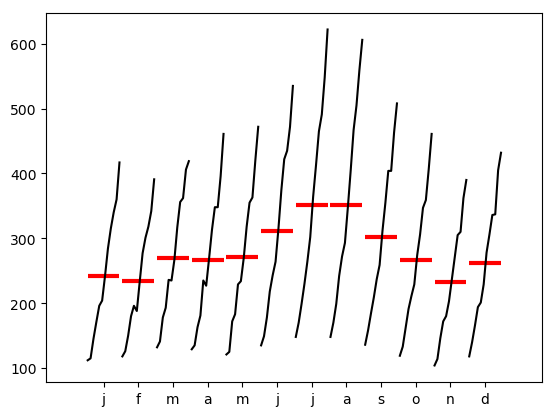

In [71]:
month_plot(df['Thousands of Passengers']);

In [73]:
quarterly_data = df.resample(rule='Q').mean()
quarterly_data.head()

,Thousands of Passengers
Month,
1949-03-31,120.666667
1949-06-30,128.333333
1949-09-30,144.000000
1949-12-31,113.666667
1950-03-31,127.333333


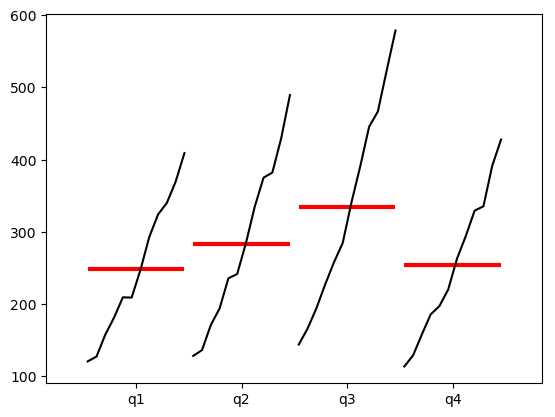

In [74]:
quarter_plot(quarterly_data);